# Connect to twitter

In [7]:
import pickle
#pip install tweepy
import tweepy
import re #https://developers.google.com/edu/python/regular-expressions
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
User = 'Lau' # ['Christian','Lau','Frederik']

Loading the policians:

In [33]:
data=pd.read_csv("danish_politkere_twitter.csv")

In [36]:
twitter_name_list=list(data["Twittername"])

Using: Lauskij@gmail.com

In [6]:
#Load keys (everytime except first)

with open('api_key_'+User+'.data', 'rb') as filehandle:
    api_key = pickle.load(filehandle) 
with open('api_key_secret_'+User+'.data', 'rb') as filehandle:
    api_secret_key = pickle.load(filehandle)
with open('access_token_'+User+'.data', 'rb') as filehandle:
    access_token = pickle.load(filehandle)
with open('access_token_secret_'+User+'.data', 'rb') as filehandle:
    access_token_secret = pickle.load(filehandle)

In [5]:
'''
# replace these values with yours
api_key = "W5HqKzagyeIERb5x6YrTLQwmu"
api_secret_key = "41FBUJTpqF2qjTTNYHxkjPqkIBDXKcfDTc5oMZYzLoYaEfN220"
access_token = "1228302223647682561-UOTpnbrw1VjOAP1zQBhnvVmOloXMvk"
access_token_secret = "tAbFRWC65NkKRgsGxEmHNamb6mXWN1jqisRMMw5xjTZo8"


#Save keys (once)
with open('api_key_'+User+'.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(api_key, filehandle)
with open('api_key_secret_'+User+'.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(api_secret_key, filehandle)
with open('access_token_'+User+'.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(access_token, filehandle)
with open('access_token_secret_'+User+'.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(access_token_secret, filehandle)
'''

Create API object

In [7]:
# Creating the authentication object
auth = tweepy.OAuthHandler(api_key, api_secret_key)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth)

Collecting posts:

In [15]:
# The Twitter user who we want to get tweets from
name = "vestager"
# Number of tweets to pull
tweetCount = 20

# Calling the user_timeline function with our parameters
tweets = api.user_timeline(id=name, count=tweetCount,tweet_mode='extended')

# foreach through all tweets pulled
for tweet in tweets:
    # printing the text stored inside the tweet object
    print(tweet.full_text)
    print(80 * '-')

RT @vonderleyen: I am shocked and saddened by the brutal attack that took place in Vienna. My thoughts are with the families of the victims…
--------------------------------------------------------------------------------
No #EUGreenDeal is possible without #DigitalEU. Thank you @BertelsmannFdn, all #EUDialogues participants and @VSinkevicius for a very engaging discussion &amp; looking forward to pursuing it! https://t.co/0rwXkWS2hp
--------------------------------------------------------------------------------
Getting ready for #EUDialogues @BertelsmannSt with @VSinkevicius on #EUGreenDeal https://t.co/j4T4S6i4VH
--------------------------------------------------------------------------------
In my mind no doubt that platforms - and the algorithms they use - can have an enormous impact on the way we see the world around us. We need to know why we are shown what we are shown.

https://t.co/5FHSXQlPBQ
--------------------------------------------------------------------------------
We 

In [68]:
#tweet_dict={name:{"Mentioned":{},"Text":{}}}

#dict

#    Navn
#       Tag_person : text_for_opslag
#       Tag_person : text_for_opslag
#       Tag_person : text_for_opslag

tweet_dict={name:{}}

In [71]:
#Example: mentioned, text
tweet_dict[name].update({"Hans erling":"Dette er en masse opslgscontent"})

In [72]:
tweet_dict

{'vestager': {'Hans erling': 'Dette er en masse opslgscontent'}}

In [ ]:
#Resettet
tweet_dict={name:{}}

In [73]:
for i,tweet in enumerate(tweets):
    # printing the text stored inside the tweet object
    
    
    
    opslag=tweet.full_text
    
    match=re.findall(r"@\w+",opslag)
    
    if len(match)>0:
        
        
        #Note first run
        first_run=1
        
        for a in range(len(match)):
            uden_snabela=str(match[a]).replace("@","")
            if uden_snabela in twitter_name_list:
                
                if first_run==1:
                    print(80 * '=')
                    print("The {}th tweet mentions a politician:".format(i))
                    
                    #Save the to "Vesterager dict"
                    tweet_dict[name].update({uden_snabela:opslag})
                    
                    #Update dummy. Not first run anymore
                    first_run=0
                
                print(uden_snabela)
                
        #Only print content if there has been a run        
        if first_run==0:
            print(80 * '=')
            print(opslag)
            print(80 * '-')
        
        

The 9th tweet mentions a politician:
SchaldemoseMEP
karmel80
#HybridDebate @SchaldemoseMEP: What is illegal off line should also be illegal online - consumers needs protection 
@karmel80 Removal of content should not be by filters but a transparent process involving humans.
Inspiring debat @Europarl_EN https://t.co/jp52cg5Lck
--------------------------------------------------------------------------------
The 11th tweet mentions a politician:
SchaldemoseMEP
@SchaldemoseMEP Selvfølgelig skynder vi os! Til dato har vi godkendt mere end 350 hjælpeordninger i EU - mere end 20 i DK. Tit på ganske få dage. Så sent som i fredags godkendte vi to danske ordninger, den ene er lønkompensation til virksomheder, der ikke kan holde åbent pga corona.
--------------------------------------------------------------------------------
The 18th tweet mentions a politician:
oestergaard
sofiecn
sofiecn
@oestergaard @radikale @sofiecn Ja, @sofiecn er god! Inddragende, principiel, dedikeret - og giver plads ti

In [75]:
tweet_dict.keys()

dict_keys(['vestager'])

In [78]:
tweet_dict['vestager'].keys()

dict_keys(['Hans erling', 'SchaldemoseMEP', 'oestergaard'])

# Download it for three persons:

In [138]:
tweet_dict={"Dummy":{}}

In [139]:
three_persons=list(data["Twittername"])

In [140]:
for p in three_persons:
    


    # The Twitter user who we want to get tweets from
    name = p
    # Number of tweets to pull
    tweetCount = 100

    # Calling the user_timeline function with our parameters
    tweets = api.user_timeline(id=name, count=tweetCount,tweet_mode='extended')

    
    ##Updating dict
    tweet_dict.update({name:{}})
    
    
    ###############========== FINDING TWEETS FOR PERSON=============#####
    
    for i,tweet in enumerate(tweets):
    # printing the text stored inside the tweet object
    
    
    
        opslag=tweet.full_text
    
        match=re.findall(r"@\w+",opslag)
    
        if len(match)>0:
        
        
            #Note first run
            first_run=1
        
            for a in range(len(match)):
                uden_snabela=str(match[a]).replace("@","")
                if uden_snabela in twitter_name_list:
                
                    if first_run==1:
                        print(80 * '=')
                        print("The {}th tweet mentions a politician:".format(i))
                    
                        #Save the to "Vesterager dict"
                        tweet_dict[name].update({uden_snabela:opslag})
                    
                        #Update dummy. Not first run anymore
                        first_run=0
                
                    print(uden_snabela)
                
            #Only print content if there has been a run        
            if first_run==0:
                print(80 * '=')
                print(opslag)
                print(80 * '-')
        
        

The 9th tweet mentions a politician:
SchaldemoseMEP
karmel80
#HybridDebate @SchaldemoseMEP: What is illegal off line should also be illegal online - consumers needs protection 
@karmel80 Removal of content should not be by filters but a transparent process involving humans.
Inspiring debat @Europarl_EN https://t.co/jp52cg5Lck
--------------------------------------------------------------------------------
The 11th tweet mentions a politician:
SchaldemoseMEP
@SchaldemoseMEP Selvfølgelig skynder vi os! Til dato har vi godkendt mere end 350 hjælpeordninger i EU - mere end 20 i DK. Tit på ganske få dage. Så sent som i fredags godkendte vi to danske ordninger, den ene er lønkompensation til virksomheder, der ikke kan holde åbent pga corona.
--------------------------------------------------------------------------------
The 18th tweet mentions a politician:
oestergaard
sofiecn
sofiecn
@oestergaard @radikale @sofiecn Ja, @sofiecn er god! Inddragende, principiel, dedikeret - og giver plads ti

The 1th tweet mentions a politician:
sofiecn
RT @BrianAMikkelsen: I @DanskErhverv glæder vi os til at fortsætte det gode samarbejde med @sofiecn. Fælles kamp om, at gøre 🇩🇰 til det bed…
--------------------------------------------------------------------------------
The 2th tweet mentions a politician:
LotteRod
RT @LotteRod: Sofie er én, man kan stole på. Hun er en stærk leder af vores parti. https://t.co/iipidierlP
--------------------------------------------------------------------------------
The 3th tweet mentions a politician:
aahlers
RT @aahlers: I debatten om grønne biler lyder det som om, at det kun skaber job i Tyskland. Forkert - ⁦@DanskIndustri⁩ estimerer vi kan ska…
--------------------------------------------------------------------------------
The 4th tweet mentions a politician:
sofiecn
Stolt af en fantastisk første tale fra den nye politiske leder hos os @radikale.
Ingen kunne have holdt netop den tale bedre end @sofiecn gjorde. Hun er en agent-of-change 😎, og hun er på

The 1th tweet mentions a politician:
nvillumsen
RT @nvillumsen: Kan forstå at Kristian Thulesen-Dahl er i tvivl om han støtter Biden eller Trump fordi DFs formand mener Trump er god udenr…
--------------------------------------------------------------------------------
The 3th tweet mentions a politician:
nvillumsen
@MajbritBerlau @nvillumsen Enig
--------------------------------------------------------------------------------
The 4th tweet mentions a politician:
MaiVilladsen
RT @MaiVilladsen: Forfærdelige meldinger fra Wien. Formentlig endnu et terrorangreb - og tilsyneladende med flere mål. Det er simpelthen så…
--------------------------------------------------------------------------------
The 7th tweet mentions a politician:
StemLAURITZEN
Det er godt gået, Karsten. Det er nemlig sådan her, man bliver en del af løsningen, selvom man tidligere var en del af problemet. At lytte, sige undskyld og ændre opførsel. Tak https://t.co/rCG8NRfqKF #metoo @StemLAURITZEN
-----------------------

The 1th tweet mentions a politician:
DanJoergensen
Glæder mig til at få svar på mine spørgsmål ang olieprisscenarier 😉 @DanJoergensen #dkpol #dkgreen https://t.co/MU7rAb4ynx
--------------------------------------------------------------------------------
The 2th tweet mentions a politician:
metteabildgaard
PiaOlsen
@BrianVad @CoHedegaard @lykkefriis @metteabildgaard @PiaOlsen @annalouisehh @MonikaSkadborg @helenehagel @NillyTaheri @MarieMynster @MHindhede @EvaTingkaer @KatrineBjerre Også et 😘 herfra
--------------------------------------------------------------------------------
The 4th tweet mentions a politician:
MaiVilladsen
signe_munk
metteabildgaard
Paulin_Anne
Klimaordførerne går til gengæld foran hvad angår ligestillingen 😄😇 @MaiVilladsen @signe_munk @metteabildgaard @Paulin_Anne #dkpol #dkgreen https://t.co/WxnFq6stxQ
--------------------------------------------------------------------------------
The 5th tweet mentions a politician:
IdaAuken
RT @NCCdk: Vinterakademiet 2020 kør

The 14th tweet mentions a politician:
PSkipperEL
PiaOlsen
mfMorten
@jonasholmdk @PSkipperEL @PiaOlsen @mfMorten Det er “næsten” rigtigt:
💙 prioriterer lavere skat for at fremme 💚 omstilling 😉
--------------------------------------------------------------------------------
The 20th tweet mentions a politician:
JakobEllemann
RT @JakobEllemann: Der er indkaldt til forhandlinger om nye hjælpepakker i aften. Selvom der har været god tid til at forberede 2. bølge af…
--------------------------------------------------------------------------------
The 22th tweet mentions a politician:
HansAndersenV
simonkollerup
RT @HansAndersenV: Hvorfor rose regeringen og @simonkollerup? Det er jo regeringen der er årsag til hele usikkerheden. Tak til @Torstenscha…
--------------------------------------------------------------------------------
The 30th tweet mentions a politician:
a_steenberg
@a_steenberg @radikale Tillykke
--------------------------------------------------------------------------------
Th

The 0th tweet mentions a politician:
Susanne_Zimmer_
RT @Susanne_Zimmer_: Iblandingskravet af førstegenerations-brændstoffer, som primært produceres af raps, soja og sukker vil rydde regnskov…
--------------------------------------------------------------------------------
The 1th tweet mentions a politician:
SikandaSIDDIQUE
RT @SikandaSIDDIQUE: Useriøst og klimaskadeligt at hverken @friegronne @Enhedslisten eller @alternativet er inviteret med, når @DanJoergens…
--------------------------------------------------------------------------------
The 2th tweet mentions a politician:
uffeelbaek
RT @Schattsneider: @uffeelbaek @spisekammeret Regeringen burde gøre langt mere! Minkindustrien skal ligesom cruise-industrien være helt luk…
--------------------------------------------------------------------------------
The 7th tweet mentions a politician:
SikandaSIDDIQUE
@kennethjakobsen @SikandaSIDDIQUE Selvfølgelig vil jeg acceptere valget, når ALLE stemmesedler er talt med. Men det betyder da i

The 6th tweet mentions a politician:
JuulMona
Vi kæmper hårdt og konstruktivt. Det kræver også vi selv spiller ind med noget. Og det gør vi. Vores stærke erhvervsordfører @JuulMona har drevet virksomhed i mange år og ved hvor skoen trykker. Vi fortsætter arbejdet. https://t.co/IuNuw8rZ7n
--------------------------------------------------------------------------------
The 12th tweet mentions a politician:
sophieloehde
@sophieloehde Puha. En træls ting at skulle igennem. Rigtig god bedring og alt det bedste
--------------------------------------------------------------------------------
The 24th tweet mentions a politician:
jacobmark_sf
JuulMona
@jacobmark_sf @JuulMona Vi gør det godt at drive virksomhed, så flere kommer i arbejde. Vi ønsker ikke at overbeskatte en ekstra indsats. Vi kan ikke alle leve af overførselsindkomst
--------------------------------------------------------------------------------
The 26th tweet mentions a politician:
jacobmark_sf
JuulMona
@jacobmark_sf @JuulMona 

The 0th tweet mentions a politician:
PiaOlsen
BennyEngelbrech
@PiaOlsen @MisvSvane @DanskIndustri @FemernAS @BennyEngelbrech Det var gode tider i transportministeriet, Pia 😊 Og helt enig, det er stort at vi nu endelig kan komme i gang med at bygge den tunnel 🙌🙌 @FemernAS
--------------------------------------------------------------------------------
The 2th tweet mentions a politician:
JeppeBruus
@JeppeBruus God bedring Jeppe.
--------------------------------------------------------------------------------
The 8th tweet mentions a politician:
DKsundhed
RT @DKsundhed: I Danmark er vi aktuelt på risikoniveau 3️⃣ “Udbredt samfundssmitte med potenitale for hurtig accelaration for smittetal”. L…
--------------------------------------------------------------------------------
The 12th tweet mentions a politician:
DKsundhed
RT @DKsundhed: Samlet set har smitten i EU, Schengen og UK været stigende siden 1. august, og situationen udvikler sig hurtigt lige nu. De…
------------------------------

The 5th tweet mentions a politician:
StemLAURITZEN
@Marchen_Neel @StemLAURITZEN Vi har netop så meget brug for ægte refleksioner som Karstens i debatten nu. Respekt og tak for mod. Det flytter.
--------------------------------------------------------------------------------
The 6th tweet mentions a politician:
PiaOlsen
@PiaOlsen Helt enig. Det skal der ændres på 💪💚
--------------------------------------------------------------------------------
The 7th tweet mentions a politician:
_MaiMercado
EllenTraneNorby
@MetteLITB @radikale @ITBranchen @DanskErhverv @di_digital_ @_MaiMercado @EllenTraneNorby Vedholdenhed, Mette. Tak for den. Nu skal vi lykkes med det.
--------------------------------------------------------------------------------
The 8th tweet mentions a politician:
FrkCallesen
RT @FrkCallesen: Idealisten taler i dag. For verden er sgu alt for uretfærdig, når de fattigste betaler prisen for andres forurening. Men:…
-----------------------------------------------------------------

The 9th tweet mentions a politician:
DKsundhed
RT @DKsundhed: Fra i dag vil være muligt for borgere med milde symptomer selv at booke en test for COVID-19 på https://t.co/Uixo6L1w1w uden…
--------------------------------------------------------------------------------
The 10th tweet mentions a politician:
MFVMin
RT @MFVMin: 5 ministre går sammen om at styrke biodiversiteten og hjælpe naturen. - Staten skal gå forrest i indsatsen for at vende tilbage…
--------------------------------------------------------------------------------
The 11th tweet mentions a politician:
Forsvarsmin
RT @Forsvarsmin: Som en af de største statslige jordejere går @Forsvaret gerne i forreste række for en mere vild natur. 

- Naturen på Fors…
--------------------------------------------------------------------------------
The 13th tweet mentions a politician:
mfMorten
skmdk
Skatteminister @mfMorten om finansiering af pensionsaftale: Den finansielle sektor skal fx bidrage mere til fællesskabet. De seneste år har

The 33th tweet mentions a politician:
mattiastesfaye
KaareDybvad
Udlændinge- og integrationsminister @mattiastesfaye går på forældreorlov mandag den 17. august til den 27. september. I mellemtiden vil boligminister @KaareDybvad fungere som udlændinge- og integrationsminister. #dkpol https://t.co/fIbGmRTatK
--------------------------------------------------------------------------------
The 1th tweet mentions a politician:
brianholm1962
RT @Eurosportdk: BREAKING⚠️
@brianholm1962 får ikke et ben til jorden i ugens nye afsnit af Radio Tour! Se det her eller hør det på podcast…
--------------------------------------------------------------------------------
The 17th tweet mentions a politician:
brianholm1962
RT @mortenbrian: @DenKorteKirsten og @brianholm1962, mine to største idoler, deler skærmtid 30 sekunder inde i Fuld af Danmark på @TV2PLAY.…
--------------------------------------------------------------------------------
The 44th tweet mentions a politician:
brianholm1962
RT @casquett

The 12th tweet mentions a politician:
Kristianthdahl
Pia_Kjaersgaard
Kære @Kristianthdahl @Pia_Kjaersgaard og resten af @DanskDf1995 Stort tillykke med de 25 år på vegne af hele Venstre. Tak for et konstruktivt samarbejde mellem vores to partier gennem mange år.  🇩🇰🇩🇰🇩🇰
--------------------------------------------------------------------------------
The 20th tweet mentions a politician:
krarup_lars
Tak for indsatsen, @krarup_lars I Herning, men så sandelig også i @venstredk! For eget vedkommende har jeg sat - og sætter fortsat - stor pris på dine råd, din fortrolighed og din ærlighed. Ting som vil bestå også efter, at du lægger borgmesterkæden. https://t.co/zHNETcLX4q
--------------------------------------------------------------------------------
The 22th tweet mentions a politician:
PernilleVermund
@PernilleVermund @venstredk Det lyder godt. Tak for opbakningen! Frit valg bør gælde i alle aldre.
--------------------------------------------------------------------------------
The 30th

The 13th tweet mentions a politician:
RasmusPrehn
RT @RasmusPrehn: #Tanzania elections: Deeply worried by irregularities, reports of detention of opposition. Call for credible investigation…
--------------------------------------------------------------------------------
The 14th tweet mentions a politician:
Statsmin
RT @Statsmin: Danish PM Mette Frederiksen: “Horrible attack in Vienna tonight. My warmest thoughts to the victims, their families and the A…
--------------------------------------------------------------------------------
The 16th tweet mentions a politician:
JeppeKofod
RT @JeppeKofod: Tragic reports of killed and injured in apparent terrorist attack in #Vienna, #Austria. 

We must and will stand united in…
--------------------------------------------------------------------------------
The 20th tweet mentions a politician:
JeppeKofod
Debattér EU 🇪🇺 med udenrigsminister @JeppeKofod. Anden #Eigtvedsdialog handler om , hvordan sikrer vi en retfærdig og grøn genopretning i EU

The 5th tweet mentions a politician:
Astridkrag
RT @Astridkrag: Vi skal beskytte børn mod radikalisering. 

I dag er jeg i Folketinget med lovforslag der skal indføre ny regel om formodni…
--------------------------------------------------------------------------------
The 9th tweet mentions a politician:
Astridkrag
RT @Astridkrag: ‘Vi forsømmer stadig børn i de her miljøer. Nogle af børnene tror fortsat, at det er okay at give lussinger, inden de går i…
--------------------------------------------------------------------------------
The 12th tweet mentions a politician:
MarieKrarup
@MariaBBjoern @MarieKrarup I dag var det fx denne ;-) https://t.co/emGudBfRXf
--------------------------------------------------------------------------------
The 14th tweet mentions a politician:
JeppeKofod
RT @JeppeKofod: Reports from #Lyon, #France of another senseless and cowardly attack against unarmed citizens.

Still too early to draw con…
-------------------------------------------------------------

The 1th tweet mentions a politician:
jacobmark_sf
JakobEllemann
RT @jacobmark_sf: Kæft det var sjovt sagt @JakobEllemann! Live på News om Trumps melding om, at han allerede har vundet; “Jeg har lært hjem…
--------------------------------------------------------------------------------
The 3th tweet mentions a politician:
regeringDK
@larswerge @regeringDK @folketinget Svaret er, at ALLE grundlæggende skal have hurtigere svar. Så derfor inddrag private testaktører, anerkend hurtig test, skab bedre adgang og fritvalg af testaktører som @venstredk har foreslået. Alle smittekæder skal brydes hurtigt #dkpol
--------------------------------------------------------------------------------
The 5th tweet mentions a politician:
Heunicke
@MichaelHedelund God bedring til jer @MichaelHedelund. Men som du, forundret over den ‘såkaldte’ smittesporing som I oplevede der, så @Heunicke kan du ikke svare på, om det er sådan smittekæder brydes?? #dkpol #sundpol @Martin_Geertsen
----------------------------

The 8th tweet mentions a politician:
AneHalsboe
@HolmeRasmus @AneHalsboe @iSilkeborg Her er to links, som du evt kan give videre. 

https://t.co/ZCmSqTV7nF

https://t.co/geDYUB6uhf
--------------------------------------------------------------------------------
The 10th tweet mentions a politician:
AneHalsboe
@HolmeRasmus @AneHalsboe @iSilkeborg Kære Rasmus. Det dur selvfølgelig ikke. Tager fat om det med det samme. Tak for beskeden. Det gør det nemmere at reagere hurtigt. I mellemtiden: Det er min opfattelse at de fleste skoler og uddsteder udleverer mundbind, hvis nogen er i bekneb.
--------------------------------------------------------------------------------
The 16th tweet mentions a politician:
EllenTraneNorby
@EllenTraneNorby @efterskolerne @dlforg @dselever @friskolerne @DanskeEG Jeg forventer at indkalde dig og den politiske følgegruppe, så vi kan vende de spørgsmål, du rejser her samt spørgsmål fra sektoren.
-------------------------------------------------------------------

The 0th tweet mentions a politician:
Nickerup
Gode tanker og ønsker om hurtig raskmelding til @Nickerup og alle andre, der kæmper med #COVID19 🙏🏻#stærkesammen
--------------------------------------------------------------------------------
The 13th tweet mentions a politician:
mattiastesfaye
Det her er helt skandaløst. Ministeren @mattiastesfaye har givet @folketinget et løfte. De penge skal IKKE til Syrien. Melder familiemorderen sig ved byretten i København, tager vi den sag..!! #gak #dkpol @anders_redder https://t.co/OIp3lfJbWe
--------------------------------------------------------------------------------
The 25th tweet mentions a politician:
Kristianthdahl
RT @DanskDf1995: Følg med ved 11-tiden, når @Kristianthdahl går på Folketingets talerstol. #dkpol #ftlive
https://t.co/oStzzjhwfb
--------------------------------------------------------------------------------
The 26th tweet mentions a politician:
skaarup_df
RT @skaarup_df: Så starter åbningsdebatten og folketingsåret for alvo

The 1th tweet mentions a politician:
larsloekke
@larsloekke @letourdk Tak, Lars. Vi har taget mange kamp i politik. Men det der står tilbage er først og fremme fælles resultater for vores hovedstad og for danmark.
--------------------------------------------------------------------------------
The 3th tweet mentions a politician:
Jens_Joel
PHummelgaard
@Jens_Joel @PHummelgaard Sejt, Peter🌹🌹🌹
--------------------------------------------------------------------------------
The 10th tweet mentions a politician:
GunvorWibroe
RT @GunvorWibroe: Den 1. oktober 1989 blev de første homo-par viet på Københavns Rådhus. Som de første i verden! Forslaget om registreret p…
--------------------------------------------------------------------------------
The 11th tweet mentions a politician:
GunvorWibroe
@GunvorWibroe Ja, det var en stor dag tilbage i 1989, da jeg var med til at sikre flertal i Folketinget for verdens første lov om registreret partnerskab mellem mennesker af samme køn. Den stolthed je

The 0th tweet mentions a politician:
SorenPape
MrMesserschmidt
@HenrikHindby @KonservativeDK @venstredk @DanskDf1995 @SorenPape @MrMesserschmidt De anbefalinger er rigtige. Men vi skal undgå tvang. Det må være de enkelte arbejdspladser (også i staten) der beslutter det - ikke finansministeren. Danskerne vil gerne spise og købe mere klimavenligt - giv dem valget.
--------------------------------------------------------------------------------
The 3th tweet mentions a politician:
mfMorten
Læser du med her @mfMorten? - erhvervslivet er meget mere optimistiske end regeringen. Og er parate til at investere i den grønne omstilling https://t.co/DHfgJvXVTd
--------------------------------------------------------------------------------
The 5th tweet mentions a politician:
RavnTroels
@allaneu @DanskErhverv @tommyandersendk @RavnTroels Nej, det gør jeg ikke. Når man investerer i en virksomhed får man aktier/anparter. Når gevinsten af de aktier beskattes er det en skat på investering
------------

The 0th tweet mentions a politician:
larsloekke
RT @larsloekke: Nu igen … Østrig. Forfærdelige terrorhandlinger og en grusom påmindelse om, at demokrati ikke er en naturlov, men noget der…
--------------------------------------------------------------------------------
The 1th tweet mentions a politician:
JeppeBruus
@JeppeBruus God bedring, Jeppe
--------------------------------------------------------------------------------
The 3th tweet mentions a politician:
JakobEllemann
RT @JakobEllemann: Iværksættere og virksomheder kæmper lige nu for at redde danske arbejdspladser og livsværk. Regeringens mange skattestig…
--------------------------------------------------------------------------------
The 4th tweet mentions a politician:
JakobEllemann
RT @JakobEllemann: Frygtelige nyheder fra Frankrig. Igen er en person blevet knivdræbt og flere er såret i et angreb, som myndighederne ans…
--------------------------------------------------------------------------------
The 9th tweet mentions a

The 6th tweet mentions a politician:
jacobmark_sf
@jacobmark_sf Men hvis vi ikke i fællesskab kan overbevise S om flere midler - også til flere pædagoger og fagligt personale - så giver det da ikke mening at prioritere samme minimumsnormeringer til alle over ekstra til de socialt udsatte?
--------------------------------------------------------------------------------
The 7th tweet mentions a politician:
jacobmark_sf
Det er altså vigtigt det her: Selvfølgelig skal vi prioritere flest ressourcer til de mest udsatte børn og daginstitutioner. Andet kan @jacobmark_sf da heller ikke mene? #dkpol https://t.co/0bxo7PQFNq
--------------------------------------------------------------------------------
The 12th tweet mentions a politician:
JeppeKofod
@JeppeKofod @GramSwg Ikke nødvendigvis. Jeg tænker blot, du er udenrigsminister for Danmark, ikke for Socialdemokratiet. Jeg tænker også, at de værdipolitiske prioriteringer, du har nævnt, ikke er noget S har patent på, men noget mange partier har 

The 8th tweet mentions a politician:
karmel80
RT @koefoed: @jacobpackert @karmel80 og hvor der ikke på forhånd er lukket valgsteder i nogle områder af byen/landet, og hvor man ikke skal…
--------------------------------------------------------------------------------
The 41th tweet mentions a politician:
SamiraNawa
RT @Cjonasson88: I @DanskErhverv har vi med @madseriksen1208 i front længe kæmpet for en kønskommission, som den @SamiraNawa fra @radikale…
--------------------------------------------------------------------------------
The 71th tweet mentions a politician:
SchaldemoseMEP
@Cjonasson88 @SchaldemoseMEP Hos @berlingske tror jeg, @ASAllarp?
--------------------------------------------------------------------------------
The 74th tweet mentions a politician:
SchaldemoseMEP
Spændende optakt til podcastoptagelse om digitalisering i EU med @SchaldemoseMEP om lidt. #eudk #DigitalEurope https://t.co/qVh1U5DpQM
--------------------------------------------------------------------------

The 11th tweet mentions a politician:
Socialindenrigs
Astridkrag
RT @Socialindenrigs: Vigtigt besøg på @DannerDk i dag. @Astridkrag fik indblik i, hvordan vi kan blive bedre til at hjælpe minoritetsetnisk…
--------------------------------------------------------------------------------
The 12th tweet mentions a politician:
Socialindenrigs
RT @Socialindenrigs: Der opstår løbende spørgsmål om #COVID19dk på socialområdet. Vores hjemmeside opdateres løbende med Q&amp;A's om COVID-19…
--------------------------------------------------------------------------------
The 16th tweet mentions a politician:
Socialindenrigs
RT @Socialindenrigs: Det skærpede forsamlingsforbud på maksimalt 10 personer gælder ikke for sociale tilbud som herberger, kvindekrisecentr…
--------------------------------------------------------------------------------
The 18th tweet mentions a politician:
Socialindenrigs
RT @Socialindenrigs: Der er indført strammere restriktioner for at bremse smittespredning. Bl.a. et fors

The 0th tweet mentions a politician:
mattiastesfaye
Lyt til @mattiastesfaye - vi må forstå alvoren ved #covid19dk https://t.co/g1L9sdwbuP
--------------------------------------------------------------------------------
The 2th tweet mentions a politician:
Heunicke
RT @Heunicke: Studie viser, at dødeligheden med #COVID19 er 65 gange højere for borgere over 69 år end for dem mellem 17 og 69 år. Så afgør…
--------------------------------------------------------------------------------
The 3th tweet mentions a politician:
PiaOlsen
JuulMona
@johnwagnerdsk @PiaOlsen @JuulMona @DSKdanmark John og Pia for pokker, nu kan jeg ikke få denne Monty Python sketch ud af hovedet 🤭 https://t.co/vT8dwBad0Z
--------------------------------------------------------------------------------
The 4th tweet mentions a politician:
JuulMona
@JuulMona Vi må lave en kaffeklub af tidligere kassedamer i #dkpol
Vi er i alt fald to 😁☕️☕️
--------------------------------------------------------------------------------
T

The 0th tweet mentions a politician:
regeringDK
@KlausRiskaer @regeringDK Det blokerer vi heller ikke for. Tværtimod. Vi beder bare om, at man fremviser en negativ test. Og åbner sågar op for hurtigtest i samarbejde med virksomhederne. Det handler om at holde smitten nede. Udelukkende.
--------------------------------------------------------------------------------
The 2th tweet mentions a politician:
mattiastesfaye
RT @mattiastesfaye: Folk bliver simpelthen nødt til at forstå alvoren. Vi forbyder ikke store bryllupsfester for at genere nogen. Det handl…
--------------------------------------------------------------------------------
The 9th tweet mentions a politician:
PHummelgaard
RT @weekendavisen: Beskæftigelsesminister @PHummelgaard s barndomsferier blev brugt hos familien i Los Angeles, og i dag føles byen som han…
--------------------------------------------------------------------------------
The 10th tweet mentions a politician:
JanEJoergensen
SoerenGade
@JanEJoergensen @Soere

The 0th tweet mentions a politician:
signe_munk
@signe_munk @KonservativeDK Nej, så ville jeg jo ikke have skrevet, at jeg var bekymret for klimaet, da jeg troede, at Trump ville vinde.
--------------------------------------------------------------------------------
The 7th tweet mentions a politician:
KHegaard
@KHegaard Undskyld!
--------------------------------------------------------------------------------
The 11th tweet mentions a politician:
ammitzbollbille
@throwthesebands @dkpolparrot @ammitzbollbille Mit bud: https://t.co/GiNzs6FFCi
--------------------------------------------------------------------------------
The 12th tweet mentions a politician:
ammitzbollbille
@williamnordby @ammitzbollbille Nemlig.
--------------------------------------------------------------------------------
The 13th tweet mentions a politician:
ammitzbollbille
@throwthesebands @dkpolparrot @ammitzbollbille Georgia og North Carolina er vundet af Trump. Han vinder formentlig også Arizona, og selv hvis 

The 0th tweet mentions a politician:
PerClausen3
@PerClausen3 @politikerpip Du kan jo spørge hende - @Enhedslisten er vel støtteparti
--------------------------------------------------------------------------------
The 6th tweet mentions a politician:
Heunicke
@Heunicke - kan man ansætte nogle af de mennesker, der er blevet arbejdsløse som følge af #COVID19dk ? https://t.co/AglXTDNyKf
--------------------------------------------------------------------------------
The 15th tweet mentions a politician:
JeppeBruus
@JeppeBruus God bedring ...
--------------------------------------------------------------------------------
The 17th tweet mentions a politician:
JanEJoergensen
EllenTraneNorby
RT @SrenKasperBents: @JanEJoergensen @EllenTraneNorby "Business as usual." https://t.co/NuEbCCUX5e
--------------------------------------------------------------------------------
The 29th tweet mentions a politician:
signe_munk
BennyEngelbrech
aahlers
rubenkidde
@mkiefer01 @h_skyggebjerg @Jeppehartmann

The 7th tweet mentions a politician:
Jesper_Pet
@Jesper_Pet Og igen - når der kommer en god forklaring tager jeg gerne mit tweet op til genovervejelse. Så hvis du har forklaringen så tweet den dog 🤔
--------------------------------------------------------------------------------
The 8th tweet mentions a politician:
Jesper_Pet
@Jesper_Pet Helt ærligt Jesper, du ville have reageret på samme måde hvis du var i opposition - vær dog forarget over at sådan noget sker fremfor at skælde oppositionen ud for at gøre sit arbejde!
--------------------------------------------------------------------------------
The 9th tweet mentions a politician:
Jesper_Pet
@Jesper_Pet Kan du måske forklare hvad der er sket? Jeg acceptere naturligvis en god forklaring - så kom endelig med den...
--------------------------------------------------------------------------------
The 10th tweet mentions a politician:
sophieloehde
RT @sophieloehde: Trist niveau. Ingen har foreslået svensk model hvor magten koncentreret 

The 1th tweet mentions a politician:
jacobmark_sf
JakobEllemann
RT @jacobmark_sf: Kæft det var sjovt sagt @JakobEllemann! Live på News om Trumps melding om, at han allerede har vundet; “Jeg har lært hjem…
--------------------------------------------------------------------------------
The 5th tweet mentions a politician:
AndersKronborg
ErlingBonnesen
RT @AndersKronborg: @ErlingBonnesen Næsten 7 timers debat om COVID-19 og Mink. En opposition kun med kritik og ingen selvstændig plan. Jeg…
--------------------------------------------------------------------------------
The 10th tweet mentions a politician:
AstridCaroee
MogensJensenS
RT @AstridCaroee: Godt at @MogensJensenS vil afdække omfanget af omvendelsesterapi. Men lad os sende et klokkeklart signal og få det helt f…
--------------------------------------------------------------------------------
The 11th tweet mentions a politician:
SamiraNawa
RT @SamiraNawa: Det er vigtigt at få afdækket omfanget af omvendelsesterapi. Ingen skal fø

The 3th tweet mentions a politician:
DKsundhed
RT @DKsundhed: Regeringen lancerer netop nu et nyt nationalt COVID-19-varslingssystem📢

Varslingssystemet skal skabe gennemsigtighed om det…
--------------------------------------------------------------------------------
The 12th tweet mentions a politician:
regeringDK
Skattesvindel 👎 
@regeringDK har styrket kontrollen. Vi skal videre. 250 nye kontrolmedarbejdere på vej i 2021. 1000 i alt frem mod 2024. Kreativiteten i international skattesvindel er enorm #dkpol  https://t.co/h3H3DMWQU6
--------------------------------------------------------------------------------
The 15th tweet mentions a politician:
BennyEngelbrech
@Supergodt @BennyEngelbrech @SEfodbold @BrondbyIF Det er et helt andet spørgsmål 😎💪💛💙
--------------------------------------------------------------------------------
The 16th tweet mentions a politician:
BennyEngelbrech
@BennyEngelbrech @SEfodbold @BrondbyIF Der er forældelsesregler for tweets 😎
--------------------------

The 4th tweet mentions a politician:
JanEJoergensen
@JanEJoergensen @politikerpip @Enhedslisten Mon du ikke skulle fokusere på, hvordan det bliver at være afhængig af både Dansk Folkeparti, LA og Nye Borgerlige.
--------------------------------------------------------------------------------
The 6th tweet mentions a politician:
pederhvelplund
RT @pederhvelplund: Vi skal uden for Christiansborg for at finde borgerlige, der vil give polske kvinder ret til gratis abort i Danmark. Ta…
--------------------------------------------------------------------------------
The 15th tweet mentions a politician:
nvillumsen
RT @nvillumsen: Forfærdelige nyheder fra Wien. Min tanker går til ofrene og de pårørende. Antisemitisme og racisme må og skal bekæmpes. #dk…
--------------------------------------------------------------------------------
The 16th tweet mentions a politician:
RosaLundEl
RT @RosaLundEl: Ikke mere had. Ikke mere antisemitisme. Ikke mere racisme. Vi har brug for at stå sammen nu! Wien

The 44th tweet mentions a politician:
skaarup_df
RT @skaarup_df: Det var en smuk og rørende dag for 75 år siden, da 106 frihedskæmpere fik en mindeværdig og ædel begravelse. Værd at erindr…
--------------------------------------------------------------------------------
The 49th tweet mentions a politician:
AdsbolAdsbl
RT @AdsbolAdsbl: I DF ønsker vi en ældrelov, https://t.co/Bwu0qwhZ0B Forslaget fra V er også en spændende ide, i DF er vi klar på løsninger…
--------------------------------------------------------------------------------
The 50th tweet mentions a politician:
skaarup_df
RT @skaarup_df: Fin coronaaftale på plads. Vores massive pres for at sætte ind over for smittekæder i særlige grupper - sammen med øvrige b…
--------------------------------------------------------------------------------
The 54th tweet mentions a politician:
MrMesserschmidt
Søren @EspersenDF har valgt at træde ud af grp.ledelsen.Kæmpe tak for en fremragende indsats! Det er samtidig en stor glæde at Morte

The 0th tweet mentions a politician:
KHegaard
@KHegaard Præcis 🤣🤣🤣🤣🤣
--------------------------------------------------------------------------------
The 6th tweet mentions a politician:
JuulMona
@PerR1962 Ej! Stop dig selv! At pålægge @JuulMona og @Martin_Geertsen et ansvar for stigende smittetal er ikke bare absurd men decideret ubehageligt! Selvfølgelig kan man kritisere restriktionerne og samtidig følge dem som borger i det her land
--------------------------------------------------------------------------------
The 11th tweet mentions a politician:
RabjergMadsen
@RabjergMadsen @DanskIndustri @DanskErhverv Hvordan kan du dog være forundret? Socialdemokraternes fokus dette efterår har været at gøre den offentlige sektor endnu større (bl.a. med en ny overførselsindkomst) og pålægge erhvervslivet endnu flere afgifter...
--------------------------------------------------------------------------------
The 16th tweet mentions a politician:
JuulMona
RT @JuulMona: Forlængelse ✅
Udvidelse ✅

The 0th tweet mentions a politician:
Carl__Valentin
RT @Carl__Valentin: Alle mink skal aflives, erfarer TV2. Som frygtet er der er sket en mutation blandt danske mink, som kan bringe effekten…
--------------------------------------------------------------------------------
The 1th tweet mentions a politician:
KirstenNormann
RT @KirstenNormann: Død alvorligt - at der er fundet mutationer, som ikke reagerer på antistoffer. Handling nu! Vi har ikke plads til en Co…
--------------------------------------------------------------------------------
The 3th tweet mentions a politician:
JakobEllemann
Kæft det var sjovt sagt @JakobEllemann! Live på News om Trumps melding om, at han allerede har vundet; “Jeg har lært hjemmefra, at man ikke skal sige den er hjemme, før den er hjemme” 😂😂 #dkpol
--------------------------------------------------------------------------------
The 4th tweet mentions a politician:
ammitzbollbille
@ammitzbollbille @dkpolparrot Googles er faktisk overskuelig og god synes

The 0th tweet mentions a politician:
mattiastesfaye
RT @mattiastesfaye: Wien, Paris og et universitet i Kabul: Islamisk fundamentalisme er både en trussel i muslimske lande og i Europa. Når e…
--------------------------------------------------------------------------------
The 3th tweet mentions a politician:
JeppeKofod
RT @JeppeKofod: Tragic reports of killed and injured in apparent terrorist attack in #Vienna, #Austria. 

We must and will stand united in…
--------------------------------------------------------------------------------
The 4th tweet mentions a politician:
mattiastesfaye
RT @mattiastesfaye: Jeg synes det øverste flag er det smukkeste #ViveLaFrance https://t.co/IC195zIprt
--------------------------------------------------------------------------------
The 5th tweet mentions a politician:
AneHalsboe
RT @bupldk: 50 millioner til pædagogisk forskning på 0-6 års-området 👏Tak til @AneHalsboe og partierne bag for at lytte til os. Det her er…
----------------------------------

The 46th tweet mentions a politician:
MogensJensenS
I #dkmedier fik @MogensJensenS lov at udlægge teksten fra landbrugsministeriernes forslag til landbrugsstøtte, som en grøn sejr. Det er desværre langt fra virkeligheden. Her er en god gennemgang af nogle af de største problemer i aftalen!👇🏻 #VoteThisCAPdown #dkpol #eudk #dkgreen https://t.co/DJW9cIkhVF
--------------------------------------------------------------------------------
The 53th tweet mentions a politician:
MarianneVind
Kira_MPH
MargreteAuken
mortenhelveg
karmel80
@MarianneVind @Kira_MPH @MargreteAuken @mortenhelveg @karmel80 Hej Marianne - det er en fejl. Tak for at gøre opmærksom på den. I min stemmeliste står der et stort NEJ til det forslag, men jeg har trykket forkert. Det går jeg straks ind og retter. Min holdning er den samme som den har været hele tiden: EU skal ikke bestemme over løn. Mvh N
--------------------------------------------------------------------------------
The 74th tweet mentions a politician:
rasmus

The 15th tweet mentions a politician:
JThulesen
Dagens gode nyhed, DF sikrer Grundtvig-centrets overlevelse: “Vi er glade for at kunne sikre fortsættelse af Center for Grundtvigforskning og dermed sikre en afgørende del af den danske kulturarv for eftertiden.” @JThulesen #dkpol #kultur https://t.co/z5USwWty76
--------------------------------------------------------------------------------
The 19th tweet mentions a politician:
Hans_Kr_Skibby
SikandaSIDDIQUE
@Hans_Kr_Skibby @SikandaSIDDIQUE Det er fuldstændig uden for kategori! Hvad er det for en total mangel på respekt, forståelse og medfølelse? Pinligt! Decideret pinligt! 🤦‍♂️😞 #dkpol
--------------------------------------------------------------------------------
The 39th tweet mentions a politician:
Pia_Kjaersgaard
Hvordan forholder @justitsdk sig til de mange og ekstreme trusler mod @Pia_Kjaersgaard på hendes liv og levned? »Gengældelsen kommer.« »Tid til at høste dit hoved.« »Vi vil slagte dig og give din krop til hundene.« »Vi vil

TweepError: [{'code': 34, 'message': 'Sorry, that page does not exist.'}]

In [130]:
del tweet_dict["Dummy"]

See the persons:

In [131]:
tweet_dict.keys()

dict_keys(['vestager', 'larsloekke', 'oestergaard'])

Create the graph:

In [132]:
G=nx.DiGraph()

Make edge from person to the ones that have been mentioned (tagged with @):

In [133]:
for pol in list(tweet_dict.keys()):
    for to_pol in list(tweet_dict[pol].keys()):
        G.add_edge(pol,to_pol)

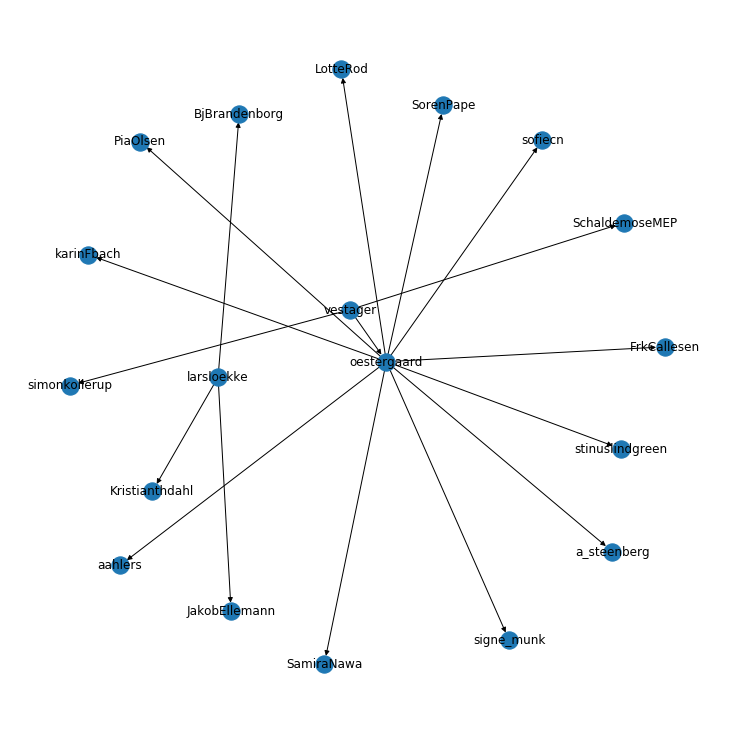

In [137]:
#plt.figure(figsize=(10,10))
#nx.draw_kamada_kawai(G,with_labels=True)
#nx.draw(G,with_labels=True)